### Scaling

- we have 2 types of scaling
  - Z score (Standardization)
  - Minmax Scalar

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
visa_df = pd.read_csv(r'C:\Users\RavindharRajula\NareshIT\Data_set_files\Visadataset.csv')
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


In [5]:
cat_cols = visa_df.select_dtypes(include='object').columns
cat_cols

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [6]:
num_cols = visa_df.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [15]:
wage_data=visa_df['prevailing_wage']   # step -1
wage_data

mean= np.mean(wage_data)   # step -2
mean

std= np.std(wage_data)   # step -3
std

numerator = wage_data- mean   # step -4
numerator

z_wage = numerator/std    # step -5
z_wage

visa_df['Z_wage']=z_wage   # step -6

In [16]:
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Z_wage
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398537
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169835
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919079
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169994
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428604


In [17]:
visa_df[['prevailing_wage','Z_wage']]

,prevailing_wage,Z_wage
0,592.2029,-1.398537
1,83425.6500,0.169835
2,122996.8600,0.919079
3,83434.0300,0.169994
4,149907.3900,1.428604
...,...,...
25475,77092.5700,0.049924
25476,279174.7900,3.876159
25477,146298.8500,1.360280
25478,86154.7700,0.221509


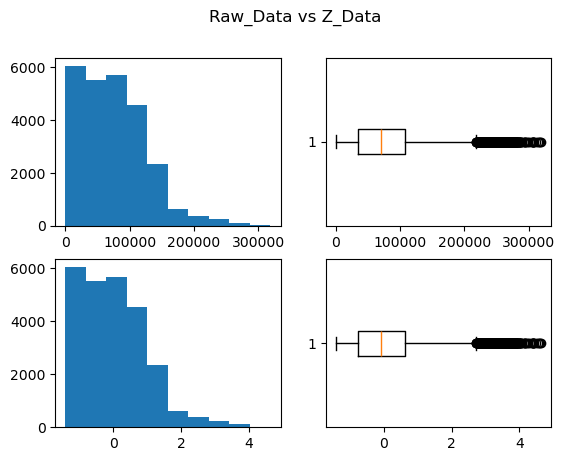

In [25]:

plt.suptitle('Raw_Data vs Z_Data')
plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'])
plt.subplot(2,2,2)
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.subplot(2,2,3)
plt.hist(visa_df['Z_wage'],label='wage_hist')
plt.subplot(2,2,4)
plt.boxplot(visa_df['Z_wage'],vert=False)
plt.show()

## StandardScaler

In [30]:
ss=StandardScaler()
visa_df['wage_scaled']=ss.fit_transform(visa_df[['prevailing_wage']])
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Z_wage,wage_scaled
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398537,-1.398537
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169835,0.169835
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919079,0.919079
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169994,0.169994
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428604,1.428604


#### reshape()

In [31]:
visa_df['prevailing_wage'].reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [32]:
visa_df['prevailing_wage'].values.reshape(-1,1)     # converting from 1D to 2D.

array([[   592.2029],
       [ 83425.65  ],
       [122996.86  ],
       ...,
       [146298.85  ],
       [ 86154.77  ],
       [ 70876.91  ]])

# Minmax_scaler

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
wage_data=visa_df['prevailing_wage']  # step 1

Min = np.min(wage_data)   #step 2

Max = np.max(wage_data)

wage_minmax= (wage_data - Min)/(Max-Min)

visa_df['Wage_MIN_MAX'] = wage_minmax

In [36]:
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Z_wage,wage_scaled,Wage_MIN_MAX
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398537,-1.398537,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169835,0.169835,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919079,0.919079,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169994,0.169994,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428604,1.428604,0.469616


In [40]:
# method
MM = MinMaxScaler()
visa_df['MIN_MAX_Method']=MM.fit_transform(visa_df['prevailing_wage'].values.reshape(-1,1))
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Z_wage,wage_scaled,Wage_MIN_MAX,MIN_MAX_Method
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398537,-1.398537,0.001849,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169835,0.169835,0.261345,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919079,0.919079,0.385312,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169994,0.169994,0.261371,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428604,1.428604,0.469616,0.469616


In [43]:
print(min(visa_df['MIN_MAX_Method']), max(visa_df['MIN_MAX_Method']))
print()
print(min(visa_df['Wage_MIN_MAX']),max(visa_df['Wage_MIN_MAX']))

0.0 0.9999999999999999

0.0 1.0
